# タイタニック沈没事故の概要

> タイタニック号沈没事故（タイタニックごうちんぼつじこ）とは、1912年4月14日の夜から4月15日の朝にかけて、イギリス・サウサンプトンからアメリカ合衆国・ニューヨーク行きの処女航海中の4日目に、北大西洋で起きた。当時世界最大の客船であったタイタニックは、1912年4月14日の23時40分（事故現場時間）に氷山に衝突した時には2,224人を乗せていた。事故が起きてから2時間40分後の翌4月15日の2時20分に沈没し、1,513人が亡くなった。これは1912年当時、海難事故の最大死者数であった。

[Wikipedia](https://ja.wikipedia.org/wiki/%E3%82%BF%E3%82%A4%E3%82%BF%E3%83%8B%E3%83%83%E3%82%AF%E5%8F%B7%E6%B2%88%E6%B2%A1%E4%BA%8B%E6%95%85)

上記から読み取れる重要事項として、以下が挙げられます。

1. 23:40に事故が発生=> 夜なので、寝ている人も多い時間帯。
2. 2224人が乗船し、2時間20分の間に1513人が死んだ。

つまり、生き残ったのは711人(2224 - 1513)

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

train = pd.read_csv("./titanic/train.csv")
test = pd.read_csv("./titanic/test.csv")
data = pd.concat([train, test], sort=True)

In [52]:
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [53]:
# https://ty-engineer.com/python/kaggle-titanic-scoreup/

#全男性のデータフレーム
def man_count(df):
    return df[(df['Sex'] == 'male')]
 
#全女性のデータフレーム
def woman_count(df):
    return df[(df['Sex'] == 'female')]
 
#男性の生存者データフレーム
def man_survived_table(df):
     return df[((df['Sex'] == 'male') & (df['Survived'] == 1))]
    
# 女性の生存者データフレーム
def woman_survived_table(df):
    return df[((df['Sex'] == 'female') & (df['Survived'] == 1))]
 
# 全体の生存者データフレーム
def passenger_survived_table(df):
    return df[(df['Survived'] == 1)]
 
#男性の生存率
def man_survived_rate(df):
    print("全男性：" + str(len(man_count(df))) + "人")
    print("男性生存数："+ str(len(man_survived_table(df))) + "人")
    return str((100 * len(man_survived_table(df)) / len(man_count(df)))) + "%"
 
#女性の生存率
def woman_survived_rate(df):
    print("全女性：" + str(len(woman_count(df))) + "人")
    print("女性生存数："+ str(len(woman_survived_table(df))) + "人")
    return str((100 * len(woman_survived_table(df)) / len(woman_count(df)))) + "%"
 
#全体の生存率
def survived_rate(df):
    print("全乗客：" + str(len(df)) + "人")
    print("生存数："+ str(len(passenger_survived_table(df))) + "人")
    return str(100 * len(passenger_survived_table(df)) / len(df)) + "%"

print(man_survived_rate(train))
print(woman_survived_rate(train))
print(survived_rate(train))

全男性：577人
男性生存数：109人
18.890814558058924%
全女性：314人
女性生存数：233人
74.20382165605096%
全乗客：891人
生存数：342人
38.38383838383838%


# データの可視化

1. 年齢の可視化
2. 男女比の可視化
3. 出港地の可視化
4. 階級の可視化
5. 客室の可視化

In [54]:
print("最頻値", train.Age.mode()[0])
print("中央値",  train.Age.median())

最頻値 24.0
中央値 28.0


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


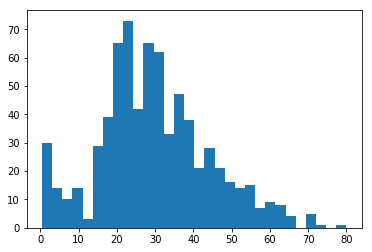

In [55]:
import seaborn as sns
# スタイルの調整
plt.hist(train.Age, bins=30) # binsで表示する棒) の数を指定しています。
plt.show()

ヒストグラムをみた感じ、20~25歳がほとんど。<br>
次に性別、年齢別で可視化してみます。

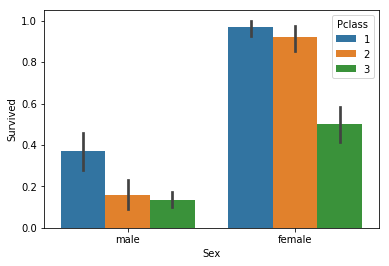

In [56]:
sns.barplot(train["Sex"], train["Survived"], hue="Pclass", data=train);
plt.show()

In [57]:
data.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket'],
      dtype='object')

In [58]:
data.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

# 特徴量エンジニアリング

下記に対してデータの前処理<br>
1. Sex<br>
2. Embarked<br>
3. Fare<br>
4. Age<br>
5. Cabin<br>

In [59]:
data["Sex"].replace(['male', 'female'], [0,1], inplace=True)

In [60]:
data.Sex.value_counts()

0    843
1    466
Name: Sex, dtype: int64

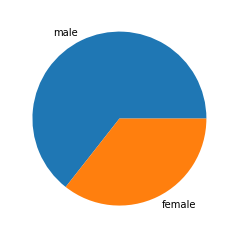

In [61]:
male = 843
female = 466
sex_data = [male, female]

plt.pie(sex_data,labels=["male", "female"])
plt.show()

In [62]:
data["Embarked"].value_counts() # Sが圧倒的に多い

S    914
C    270
Q    123
Name: Embarked, dtype: int64

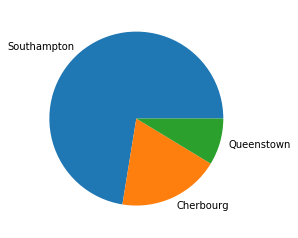

In [63]:
em = [644, 168, 77]
plt.pie(em, labels=["Southampton", "Cherbourg", "Queenstown"])
plt.show()

In [64]:
# 欠損値は、多かったSで埋める
data['Embarked'].fillna(('S'), inplace=True)

In [65]:
# 欠損値がなくなる。
data["Embarked"].isnull().sum()

0

In [66]:
data['Embarked'] = data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [67]:
data['Embarked'] .head()

0    0
1    1
2    0
3    0
4    0
Name: Embarked, dtype: int32

In [68]:
data["Fare"].isnull().sum()

1

In [69]:
# 平均で埋める
data['Fare'].fillna(np.mean(data['Fare']), inplace=True)

In [70]:
age_avg = data['Age'].mean()
age_std = data['Age'].std()

In [71]:
'''欠損値穴埋め'''
data['Age'].fillna(np.random.randint(age_avg - age_std, age_avg + age_std), inplace=True)

In [72]:
delete_columns = ['Name', 'PassengerId', 'SibSp', 'Parch', 'Ticket', 'Cabin']
data.drop(delete_columns, axis = 1, inplace = True)

In [73]:
data.isnull().sum()

Age           0
Embarked      0
Fare          0
Pclass        0
Sex           0
Survived    418
dtype: int64

In [74]:
data.head()

,Age,Embarked,Fare,Pclass,Sex,Survived
0,22.0,0,7.2500,3,0,0.0
1,38.0,1,71.2833,1,1,1.0
2,26.0,0,7.9250,3,1,1.0
3,35.0,0,53.1000,1,1,1.0
4,35.0,0,8.0500,3,0,0.0


In [83]:
'''正規化追記'''
# import scipy.stats
# data['Age'] = scipy.stats.zscore(data['Age'])
# data['Fare'] = scipy.stats.zscore(data['Fare'])

from sklearn import preprocessing
mm = preprocessing.MinMaxScaler()
data = mm.fit_transform(data)
data = pd.DataFrame(data)
data.columns = ["Age","Embarked","Fare","Pclass","Sex","Survived"]

In [84]:
data.head()

,Age,Embarked,Fare,Pclass,Sex,Survived
0,0.273456,0.0,0.014151,1.0,0.0,0.0
1,0.473882,0.5,0.139136,0.0,1.0,1.0
2,0.323563,0.0,0.015469,1.0,1.0,1.0
3,0.436302,0.0,0.103644,0.0,1.0,1.0
4,0.436302,0.0,0.015713,1.0,0.0,0.0


In [ ]:
'''追記終'''

In [85]:
train = data[:len(train)]
test = data[len(train):]

In [86]:
train.isnull().sum()

Age         0
Embarked    0
Fare        0
Pclass      0
Sex         0
Survived    0
dtype: int64

In [87]:
test.isnull().sum()

Age           0
Embarked      0
Fare          0
Pclass        0
Sex           0
Survived    418
dtype: int64

In [88]:
# データの分割
y_train = train['Survived']
X_train = train.drop('Survived', axis = 1)
X_test = test.drop('Survived', axis = 1)

In [89]:
X_train.head()

,Age,Embarked,Fare,Pclass,Sex
0,0.273456,0.0,0.014151,1.0,0.0
1,0.473882,0.5,0.139136,0.0,1.0
2,0.323563,0.0,0.015469,1.0,1.0
3,0.436302,0.0,0.103644,0.0,1.0
4,0.436302,0.0,0.015713,1.0,0.0


In [90]:
y_train.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [92]:
model1 = LogisticRegression(penalty='l2', solver="sag", random_state=0)

In [93]:
model1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)

In [94]:
y_pred = model1.predict(X_test)

In [95]:
y_pred[:15]

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1.])

# 提出用のcsvファイルを作成

In [96]:
sub = pd.DataFrame(pd.read_csv("./titanic/test.csv")['PassengerId'])
sub['Survived'] = list(map(int, y_pred))
sub.to_csv("submission01.csv", index = False)

In [97]:
model2 = RandomForestClassifier()
model2.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [98]:
y_pred2 = model2.predict(X_test)

In [99]:
sub = pd.DataFrame(pd.read_csv("./titanic/test.csv")['PassengerId'])
sub['Survived'] = list(map(int, y_pred2))
sub.to_csv("submission02.csv", index = False)

# グリッドサーチ

In [39]:
from sklearn.model_selection import GridSearchCV
param = {'n_estimators':[10,100,500,1000],'max_depth':[3,6,12],'criterion':['gini','entropy'],'random_state':[7]}
grid_forest = GridSearchCV(model2 ,param) #defaultではcv=3なのでデータを3つに分け、3回交差検証が行われます
grid_forest.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 100, 500, 1000], 'max_depth': [3, 6, 12], 'criterion': ['gini', 'entropy'], 'random_state': [7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [40]:
# 最適なパラメータを取得
grid_forest.best_params_

{'criterion': 'gini', 'max_depth': 6, 'n_estimators': 100, 'random_state': 7}

In [41]:
best_forest=RandomForestClassifier(max_depth= 6, n_estimators=500, criterion='entropy',random_state=7)
best_forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=7, verbose=0, warm_start=False)

In [42]:
y_pred3 = best_forest.predict(X_test)

In [43]:
# best_forest.oob_score_

In [44]:
y_pred3[:15]

array([0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1.])

In [45]:
sub = pd.DataFrame(pd.read_csv("./titanic/test.csv")['PassengerId'])
sub['Survived'] = list(map(int, y_pred3))
sub.to_csv("submission03.csv", index = False)

In [46]:
adaboost = AdaBoostClassifier(random_state=0)
model4 = adaboost.fit(X_train,y_train)

In [47]:
y_pred4 = model4.predict(X_test)

In [48]:
y_pred4[:15]

array([0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1.])

In [49]:
def create_subfile(pred, num):
    filename = "submission0" + str(num) + ".csv"
    sub = pd.DataFrame(pd.read_csv("./titanic/test.csv")['PassengerId'])
    sub['Survived'] = list(map(int, pred))
    sub.to_csv(filename, index = False)
    print("created csv file.")

In [50]:
create_subfile(y_pred4, 4) # Score: 0.78947

created csv file.
